In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class GridWorld(object):
    def __init__(self):
        
        ### Attributes defining the Gridworld #######
        # Shape of the gridworld
        self.shape = (4,4)
        
        # Locations of the obstacles
        self.obstacle_locs = [(1,2),(2,0),(3,0),(3,1),(3,3)]
        
        # Locations for the absorbing states
        self.absorbing_locs = [(0,0), (3,2)]
        
        # Rewards for each of the absorbing states 
        self.special_rewards = [10, -100] #corresponds to each of the absorbing_locs
        
        # Reward for all the other states
        self.default_reward = -1
        
        # Starting location
        self.starting_loc = (2,2)
        
        # Action names
        self.action_names = ['N','E','S','W']
        
        # Number of actions
        self.action_size = len(self.action_names)
        
        
        # Randomizing action results: [1 0 0 0] to no Noise in the action results.
        self.action_randomizing_array = [1.0, 0.0, 0.0, 0.0]
        
        ############################################
    
    
    
        #### Internal State  ####
        
    
        # Get attributes defining the world
        state_size, T, R, absorbing, locs = self.build_grid_world()
        
        # Number of valid states in the gridworld (there are 22 of them)
        self.state_size = state_size
        
        # Transition operator (3D tensor)
        self.T = T
        
        # Reward function (3D tensor)
        self.R = R
        
        # Absorbing states
        self.absorbing = absorbing
        
        # The locations of the valid states
        self.locs = locs
        
        # Number of the starting state
        self.starting_state = self.loc_to_state(self.starting_loc, locs);
        
        # Locating the initial state
        self.initial = np.zeros((1,len(locs)));
        self.initial[0,self.starting_state] = 1
        
        
        # Placing the walls on a bitmap
        self.walls = np.zeros(self.shape);
        for ob in self.obstacle_locs:
            self.walls[ob]=1
            
        # Placing the absorbers on a grid for illustration
        self.absorbers = np.zeros(self.shape)
        for ab in self.absorbing_locs:
            self.absorbers[ab] = -1
        
        # Placing the rewarders on a grid for illustration
        self.rewarders = np.zeros(self.shape)
        for i, rew in enumerate(self.absorbing_locs):
            self.rewarders[rew] = self.special_rewards[i]
        
        #Illustrating the grid world
        self.paint_maps()
        ################################
    
    
    
    
    
    ####### Getters ###########
    
    def get_transition_matrix(self):
        return self.T
    
    def get_reward_matrix(self):
        return self.R
    
    
    ########################
    
    ####### Methods #########
    
    
#     def value_iteration(self, discount, threshold, probability):
#         V = np.zeros(self.state_size)
        
#         T = self.get_transition_matrix()
#         R = self.get_reward_matrix()
        
#         epochs = 0
#         while True:
#             epochs+=1
#             delta = 0

#             for state_idx in range(self.state_size):
#                 if(self.absorbing[0,state_idx]):
#                     continue 
                    
#                 v = V[state_idx]

#                 Q = np.zeros(4)
#                 for state_idx_prime in range(self.state_size):
#                     if state_idx_prime == 0:
#                         first_prime = 1
#                         second_prime = 2
#                         third_prime = 3
#                     elif state_idx_prime == 1:
#                         first_prime = 0
#                         second_prime = 2
#                         third_prime = 3
#                     elif state_idx_prime == 2:
#                         first_prime = 0
#                         second_prime = 1
#                         third_prime = 3  
#                     elif state_idx_prime == 3:
#                         first_prime = 0
#                         second_prime = 1
#                         third_prime = 2
#                     Q += probability * (T[state_idx_prime,state_idx,:] * (R[state_idx_prime,state_idx, :] + discount * V[state_idx_prime])) +\
#                     (1-probability)/3 * (T[first_prime,state_idx,:] * (R[first_prime,state_idx, :] + discount * V[first_prime]))+\
#                     (1-probability)/3 * (T[second_prime,state_idx,:] * (R[second_prime,state_idx, :] + discount * V[second_prime]))+\
#                     (1-probability)/3 * (T[third_prime,state_idx,:] * (R[third_prime,state_idx, :] + discount * V[third_prime]))

#                 V[state_idx]= np.max(Q)
#                 delta = max(delta,np.abs(v - V[state_idx]))
#             if(delta<threshold):
#                 optimal_policy = np.zeros((self.state_size, self.action_size))
#                 for state_idx in range(self.state_size):
#                     Q = np.zeros(4)
#                     for state_idx_prime in range(self.state_size):
#                         if state_idx_prime == 0:
#                             first_prime = 1
#                             second_prime = 2
#                             third_prime = 3
#                         elif state_idx_prime == 1:
#                             first_prime = 0
#                             second_prime = 2
#                             third_prime = 3
#                         elif state_idx_prime == 2:
#                             first_prime = 0
#                             second_prime = 1
#                             third_prime = 3  
#                         elif state_idx_prime == 3:
#                             first_prime = 0
#                             second_prime = 1
#                             third_prime = 2
#                         Q += probability * (T[state_idx_prime,state_idx,:] * (R[state_idx_prime,state_idx, :] + discount * V[state_idx_prime])) +\
#                         (1-probability)/3 * (T[first_prime,state_idx,:] * (R[first_prime,state_idx, :] + discount * V[first_prime]))+\
#                         (1-probability)/3 * (T[second_prime,state_idx,:] * (R[second_prime,state_idx, :] + discount * V[second_prime]))+\
#                         (1-probability)/3 * (T[third_prime,state_idx,:] * (R[third_prime,state_idx, :] + discount * V[third_prime]))
                        
                    
#                     optimal_policy[state_idx, np.argmax(Q)]=1

                
#                 return V, optimal_policy,epochs


    
#     def policy_iteration(self, discount=0.9, threshold = 0.0001):
#         policy= np.zeros((self.state_size, self.action_size))
#         policy[:,0] = 1
        
#         T = self.get_transition_matrix()
#         R = self.get_reward_matrix()
        
#         epochs =0
#         while True: 
#             V, epochs_eval = self.policy_evaluation(policy, threshold, discount)
            
#             epochs+=epochs_eval
#             #Policy iteration
#             policy_stable = True
            
#             for state_idx in range(policy.shape[0]):
#                 if(self.absorbing[0,state_idx]):
#                     continue 
                    
#                 old_action = np.argmax(policy[state_idx,:])
                
#                 Q = np.zeros(4)
#                 for state_idx_prime in range(policy.shape[0]):
#                     Q += T[state_idx_prime,state_idx,:] * (R[state_idx_prime,state_idx, :] + discount * V[state_idx_prime])
                
#                 new_policy = np.zeros(4)
#                 new_policy[np.argmax(Q)]=1
#                 policy[state_idx] = new_policy
                
#                 if(old_action !=np.argmax(policy[state_idx])):
#                     policy_stable = False
            
#             if(policy_stable):
#                 return V, policy,epochs
                
                
                
        
    
    def policy_evaluation(self, policy, threshold, discount, probability):
        
        # Make sure delta is bigger than the threshold to start with
        delta= 2*threshold
        
        #Get the reward and transition matrices
        R = self.get_reward_matrix()
        T = self.get_transition_matrix()
        
        # The value is initialised at 0
        V = np.zeros(policy.shape[0])
        # Make a deep copy of the value array to hold the update during the evaluation
        Vnew = np.copy(V)
        
        epoch = 0
        # While the Value has not yet converged do:
        while delta>threshold:
            epoch += 1
            for state_idx in range(policy.shape[0]):
                # If it is one of the absorbing states, ignore
                if(self.absorbing[0,state_idx]):
                    continue   
                
                # Accumulator variable for the Value of a state
                tmpV = 0
                for action_idx in range(policy.shape[1]):
                    # Accumulator variable for the State-Action Value
                    tmpQ = 0
                    for state_idx_prime in range(policy.shape[0]):
                        
                        tmpQ = tmpQ + probability* (T[state_idx_prime,state_idx,action_idx] * (R[state_idx_prime,state_idx, action_idx] + discount * V[state_idx_prime]))+\
                        (1-probability)/3 * (T[state_idx_prime,state_idx,(action_idx+1)%4] * (R[state_idx_prime,state_idx, (action_idx+1)%4] + discount * V[state_idx_prime]))+\
                        (1-probability)/3 * (T[state_idx_prime,state_idx,(action_idx+2)%4] * (R[state_idx_prime,state_idx, (action_idx+2)%4] + discount * V[state_idx_prime]))+\
                        (1-probability)/3 * (T[state_idx_prime,state_idx,(action_idx+3)%4] * (R[state_idx_prime,state_idx, (action_idx+3)%4] + discount * V[state_idx_prime]))
                    
                    tmpV += policy[state_idx,action_idx] * tmpQ
                    
                # Update the value of the state
                Vnew[state_idx] = tmpV
            
            # After updating the values of all states, update the delta
            delta =  max(abs(Vnew-V))
            # and save the new value into the old
            V=np.copy(Vnew)
            
        return V, epoch, policy
    
    def draw_deterministic_policy(self, Policy):
        # Draw a deterministic policy
        # The policy needs to be a np array of 22 values between 0 and 3 with
        # 0 -> N, 1->E, 2->S, 3->W
        plt.figure()
        
        plt.imshow(self.walls+self.rewarders +self.absorbers)
        #plt.hold('on')
        for state, action in enumerate(Policy):
            if(self.absorbing[0,state]):
                continue
            arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"]
            action_arrow = arrows[action]
            location = self.locs[state]
            plt.text(location[1], location[0], action_arrow, ha='center', va='center')
    
        plt.show()
    ##########################
    
    
    ########### Internal Helper Functions #####################
    def paint_maps(self):
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(self.walls)
        plt.subplot(1,3,2)
        plt.imshow(self.absorbers)
        plt.subplot(1,3,3)
        plt.imshow(self.rewarders)
        plt.show()
        
    def build_grid_world(self):
        # Get the locations of all the valid states, the neighbours of each state (by state number),
        # and the absorbing states (array of 0's with ones in the absorbing states)
        locations, neighbours, absorbing = self.get_topology()
        
        # Get the number of states
        S = len(locations)
        
        # Initialise the transition matrix
        T = np.zeros((S,S,4))
        
        for action in range(4):
            for effect in range(4):
                
                # Randomize the outcome of taking an action
                outcome = (action+effect+1) % 4
                if outcome == 0:
                    outcome = 3
                else:
                    outcome -= 1
    
                # Fill the transition matrix
                prob = self.action_randomizing_array[effect]
                for prior_state in range(S):
                    post_state = neighbours[prior_state, outcome]
                    post_state = int(post_state)
                    T[post_state,prior_state,action] = T[post_state,prior_state,action]+prob
                    
    
        # Build the reward matrix
        R = self.default_reward*np.ones((S,S,4))
        for i, sr in enumerate(self.special_rewards):
            post_state = self.loc_to_state(self.absorbing_locs[i],locations)
            R[post_state,:,:]= sr
        
        return S, T,R,absorbing,locations
    
    def get_topology(self):
        height = self.shape[0]
        width = self.shape[1]
        
        index = 1 
        locs = []
        neighbour_locs = []
        
        for i in range(height):
            for j in range(width):
                # Get the locaiton of each state
                loc = (i,j)
                
                #And append it to the valid state locations if it is a valid state (ie not absorbing)
                if(self.is_location(loc)):
                    locs.append(loc)
                    
                    # Get an array with the neighbours of each state, in terms of locations
                    local_neighbours = [self.get_neighbour(loc,direction) for direction in ['nr','ea','so', 'we']]
                    neighbour_locs.append(local_neighbours)
                
        # translate neighbour lists from locations to states
        num_states = len(locs)
        state_neighbours = np.zeros((num_states,4))
        
        for state in range(num_states):
            for direction in range(4):
                # Find neighbour location
                nloc = neighbour_locs[state][direction]
                
                # Turn location into a state number
                nstate = self.loc_to_state(nloc,locs)
      
                # Insert into neighbour matrix
                state_neighbours[state,direction] = nstate;
                
    
        # Translate absorbing locations into absorbing state indices
        absorbing = np.zeros((1,num_states))
        for a in self.absorbing_locs:
            absorbing_state = self.loc_to_state(a,locs)
            absorbing[0,absorbing_state] =1
        
        return locs, state_neighbours, absorbing 

    def loc_to_state(self,loc,locs):
        #takes list of locations and gives index corresponding to input loc
        return locs.index(tuple(loc))


    def is_location(self, loc):
        # It is a valid location if it is in grid and not obstacle
        if(loc[0]<0 or loc[1]<0 or loc[0]>self.shape[0]-1 or loc[1]>self.shape[1]-1):
            return False
        elif(loc in self.obstacle_locs):
            return False
        else:
             return True
            
    def get_neighbour(self,loc,direction):
        #Find the valid neighbours (ie that are in the grif and not obstacle)
        i = loc[0]
        j = loc[1]
        
        nr = (i-1,j)
        ea = (i,j+1)
        so = (i+1,j)
        we = (i,j-1)
        
        # If the neighbour is a valid location, accept it, otherwise, stay put
        if(direction == 'nr' and self.is_location(nr)):
            return nr
        elif(direction == 'ea' and self.is_location(ea)):
            return ea
        elif(direction == 'so' and self.is_location(so)):
            return so
        elif(direction == 'we' and self.is_location(we)):
            return we
        else:
            #default is to return to the same location
            return loc
        
###########################################         
    
                
                        
                
        
        
        
        
        

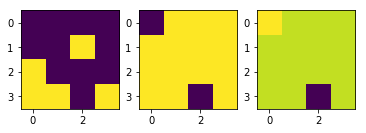

The Policy is : [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
[  0.           1.74999375  -1.00003125  -1.0001       1.7500625
  -0.9999625   -1.0001      -1.00071875 -25.75069375  -1.00071875
   0.        ]


In [13]:
grid = GridWorld()

### Question 1 : Change the policy here:
Policy= np.zeros((grid.state_size, grid.action_size))
Policy = Policy + 0.25
print("The Policy is : {}".format(Policy))
discount = 20
theta = 0.0001
probability = 0.4
V, epochs,policy = grid.policy_evaluation(Policy, discount, theta, probability)
print(V)
# print("The optimal policy using value iteration is {}".format(pol_opt2))

# val, epochs = grid.policy_evaluation(Policy,0.001,0.9)
# print("The value of that policy is :{}".format(val))
# print("It took {} epochs".format(epochs))


# gamma_range = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# epochs_needed = []
# for gamma in gamma_range:
#     val, epochs = grid.policy_evaluation(Policy,0.001,gamma)
#     epochs_needed.append(epochs)
    
# plt.figure()
# plt.plot(gamma_range,epochs_needed)
# plt.show()


# V_opt, pol_opt, epochs = grid.policy_iteration()
# print("The value of the optimal policy using policy iteration is {}:".format(V_opt))
# print("The optimal policy using policy iteration is {}".format(pol_opt))
# print("The number of epochs for convergence are {}".format(epochs))


# pol_opt2, epochs = grid.value_iteration()
# print("The optimal policy using value iteration is {}".format(pol_opt2))
# print("The number of epocs for convergence is {}".format(epochs))



In [ ]:
# Using draw_deterministic_policy to illustrate some arbitracy policy.
# Policy2 = np.array([np.argmax(pol_opt[row,:]) for row in range(grid.state_size)])


# grid.draw_deterministic_policy(policy)


In [ ]:
def display_V(V):  
    count = 0
    for i in range(16):
        if i in [6,8,12,13,15]:
            print'{0:>6.2f}'.format(0.0),
        else:
            print'{0:>6.2f}'.format(V[count]),
            count +=1
        if (i + 1) % 4 == 0:
            print("")
    print()

In [ ]:
display_V(V)